### Problem Statement

The primary objective of this dataset is to analyze and understand the global trends in AI employment and compensation. By examining various factors such as job roles, locations, experience levels, and industries, stakeholders can gain insights into:
Demand for AI roles across different regions and sectors. Salary benchmarks for various AI positions. Skill requirements and their impact on compensation. Trends over time, helping to forecast future developments in the AI job market. 




### Column Description

Job Title: The specific title of the AI-related position.

Company: The name of the hiring organization.

Location: Geographical location of the job.

Experience Level: Required experience for the role (e.g., Entry-level, Mid-level, Senior).

Industry: The sector in which the company operates (e.g., Healthcare, Finance, Technology).

Employment Type: Nature of employment (e.g., Full-time, Part-time, Contract).

Remote: Indicates if the job is remote-friendly.

Salary: Compensation offered for the position, possibly in various currencies.

Skills Required: List of technical and soft skills necessary for the role.

Date Posted: When the job listing was published.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv("C:\\Users\\sidhi\\Downloads\\ai_job_dataset.csv")

In [3]:
df

,job_id,job_title,salary,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,18-10-2024,07-11-2024,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,20-11-2024,11-01-2025,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,18-03-2025,07-04-2025,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,23-12-2024,24-02-2025,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,15-04-2025,23-06-2025,1989,6.6,Advanced Robotics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,AI14996,Robotics Engineer,38604,USD,EN,FL,Finland,S,Finland,50,"Java, Kubernetes, Azure",Bachelor,1,Energy,06-02-2025,25-03-2025,1635,7.9,Advanced Robotics
14996,AI14997,Machine Learning Researcher,57811,GBP,EN,CT,United Kingdom,M,United Kingdom,0,"Mathematics, Docker, SQL, Deep Learning",Master,0,Government,16-10-2024,30-10-2024,1624,8.2,Smart Analytics
14997,AI14998,NLP Engineer,189490,USD,EX,CT,South Korea,L,South Korea,50,"Scala, Spark, NLP",Associate,17,Manufacturing,19-03-2024,02-05-2024,1336,7.4,AI Innovations
14998,AI14999,Head of AI,79461,EUR,EN,FT,Netherlands,M,Netherlands,0,"Java, Computer Vision, Python, TensorFlow",PhD,1,Real Estate,22-03-2024,23-04-2024,1935,5.6,Smart Analytics


In [4]:
df.shape

(15000, 19)

In [5]:
df.columns

Index(['job_id', 'job_title', 'salary', 'salary_currency', 'experience_level',
       'employment_type', 'company_location', 'company_size',
       'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'application_deadline', 'job_description_length', 'benefits_score',
       'company_name'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary                  15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [7]:
df.isna().sum()

job_id                    0
job_title                 0
salary                    0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,salary,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


In [10]:
df.head()

,job_id,job_title,salary,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,18-10-2024,07-11-2024,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,20-11-2024,11-01-2025,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,18-03-2025,07-04-2025,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,23-12-2024,24-02-2025,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,15-04-2025,23-06-2025,1989,6.6,Advanced Robotics


In [11]:
df.shape

(15000, 19)

### Finding Outliers

In [7]:
numerical_value = df.select_dtypes(exclude="object")
numerical_value

,salary,remote_ratio,years_experience,job_description_length,benefits_score
0,90376,50,9,1076,5.9
1,61895,100,1,1268,5.2
2,152626,0,2,1974,9.4
3,80215,50,7,1345,8.6
4,54624,100,0,1989,6.6
...,...,...,...,...,...
14995,38604,50,1,1635,7.9
14996,57811,0,0,1624,8.2
14997,189490,50,17,1336,7.4
14998,79461,0,1,1935,5.6


<Axes: xlabel='salary'>

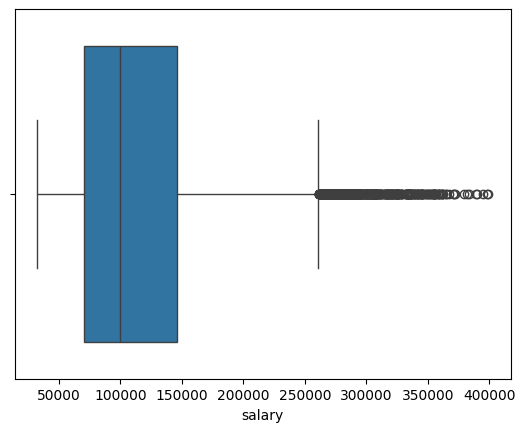

In [8]:
sns.boxplot(x="salary",data=df)

<Axes: xlabel='remote_ratio'>

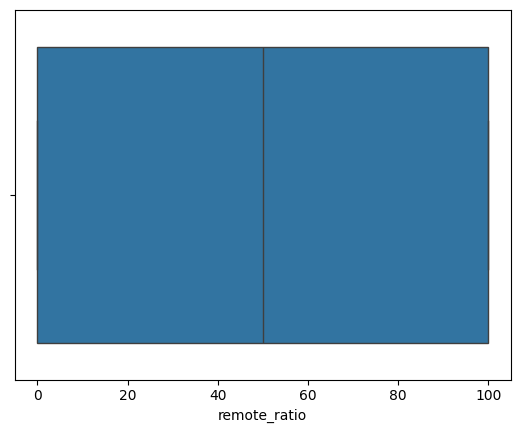

In [42]:
sns.boxplot(x="remote_ratio",data=df)

<Axes: xlabel='years_experience'>

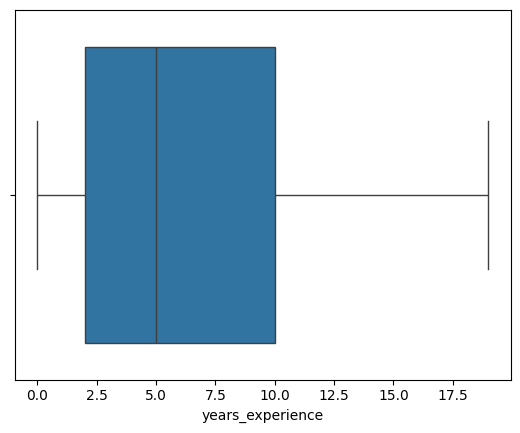

In [43]:
sns.boxplot(x="years_experience",data=df)

<Axes: xlabel='job_description_length'>

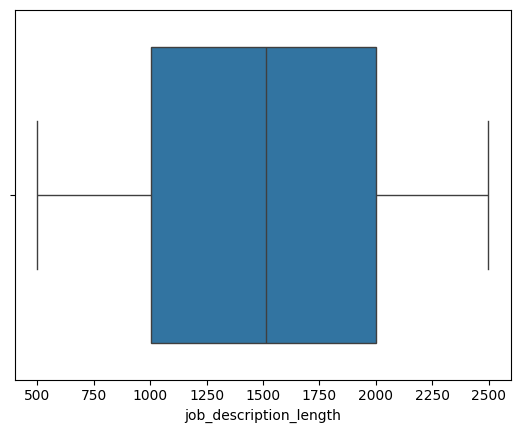

In [20]:
sns.boxplot(x="job_description_length",data=df)

<Axes: xlabel='benefits_score'>

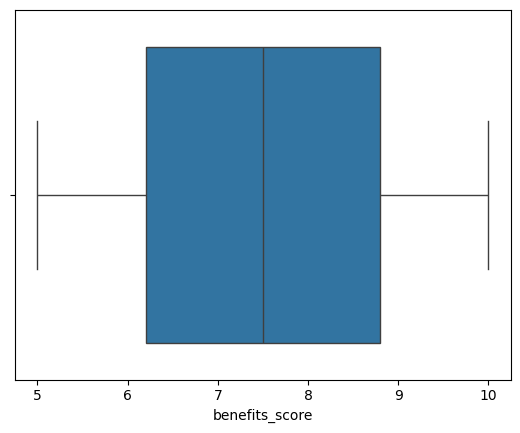

In [21]:
sns.boxplot(x="benefits_score",data=df)

We can see salary_usd column have outliers.

### Removing Outliers

In [44]:
df = df[df['salary'] <df['salary'].quantile(0.99)]

<Axes: xlabel='salary'>

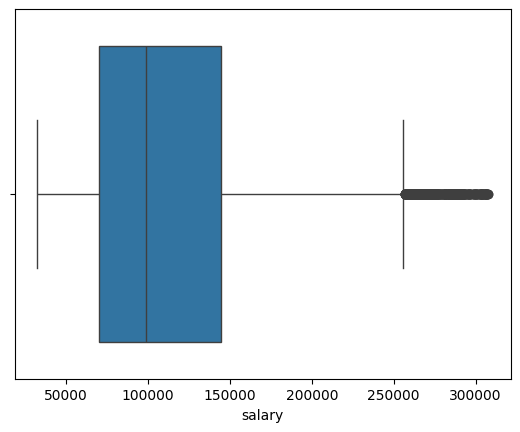

In [45]:
sns.boxplot(x='salary',data=df)

In [46]:
df.shape

(14850, 19)

### PERFORMING EXPLORATORY DATA ANALYSIS(EDA)

In [47]:
df['salary'].value_counts()

salary
67253     4
51000     4
149281    3
127730    3
85131     3
         ..
155803    1
164620    1
127611    1
33092     1
54209     1
Name: count, Length: 14166, dtype: int64

In [48]:
df['salary'].min(),df['salary'].max()

(np.int64(32519), np.int64(307774))

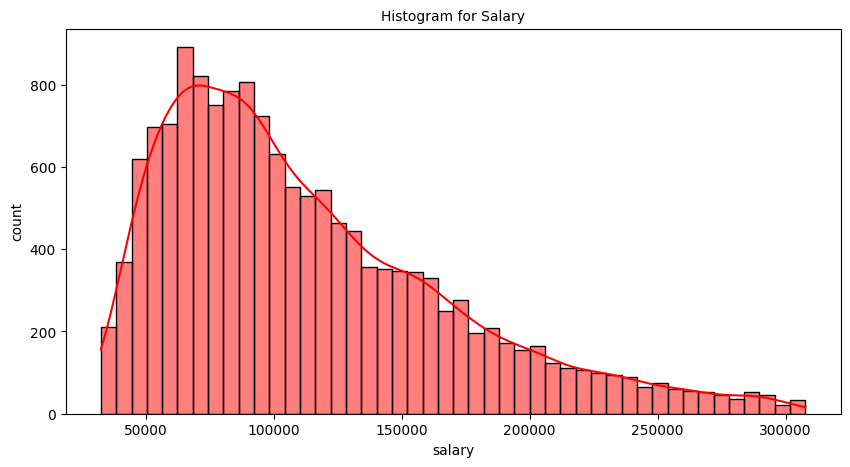

In [49]:
plt.figure(figsize=(10,5))
sns.histplot(x='salary',data=df,color="r", kde=True)
plt.title('Histogram for Salary',fontsize=10)
plt.xlabel('salary',fontsize=10)
plt.ylabel('count',fontsize=10)
plt.show()

Observation:

            * Many people earn salaries between 50000 - 100000
            * Few people earn salaries more than 200000.

### Compare Salary and Job title

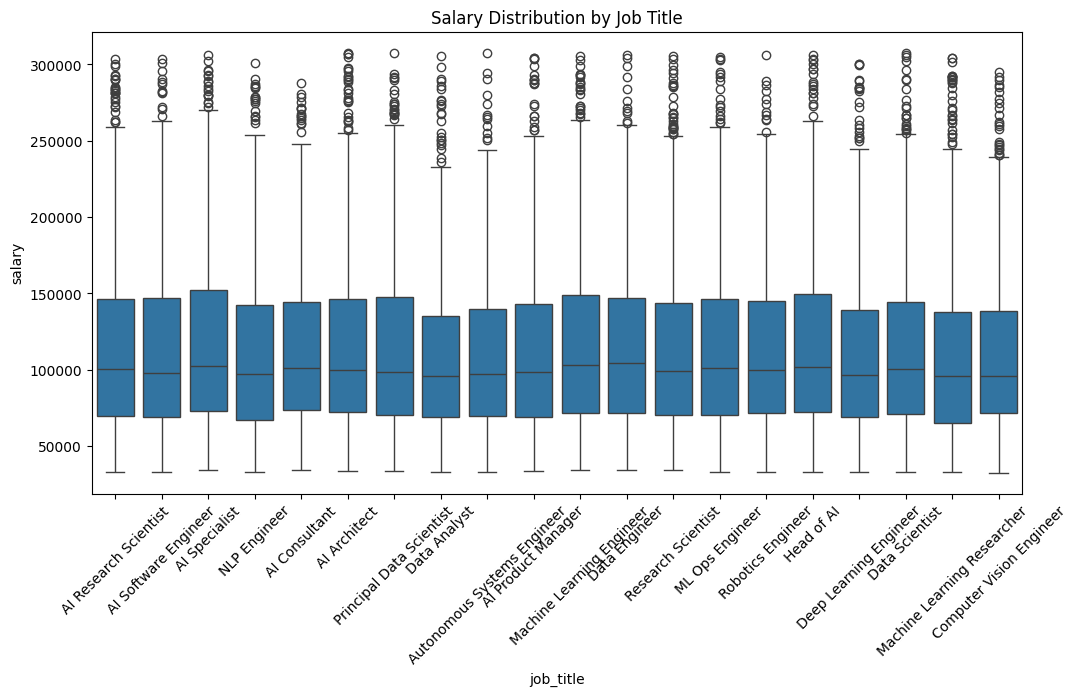

In [52]:
plt.figure(figsize=(12,6))
sns.boxplot(x='job_title', y='salary', data=df)
plt.xticks(rotation=45)
plt.title('Salary Distribution by Job Title')
plt.show()

Observation

           * Jobs like AI Researcher and ML Engineer usually pay more.
           * Data Scientist salaries are very different from person to person—some earn more.
           * AI Interns earn the least, and most of them get around the same pay.


### Compare Salary with Salary Currency

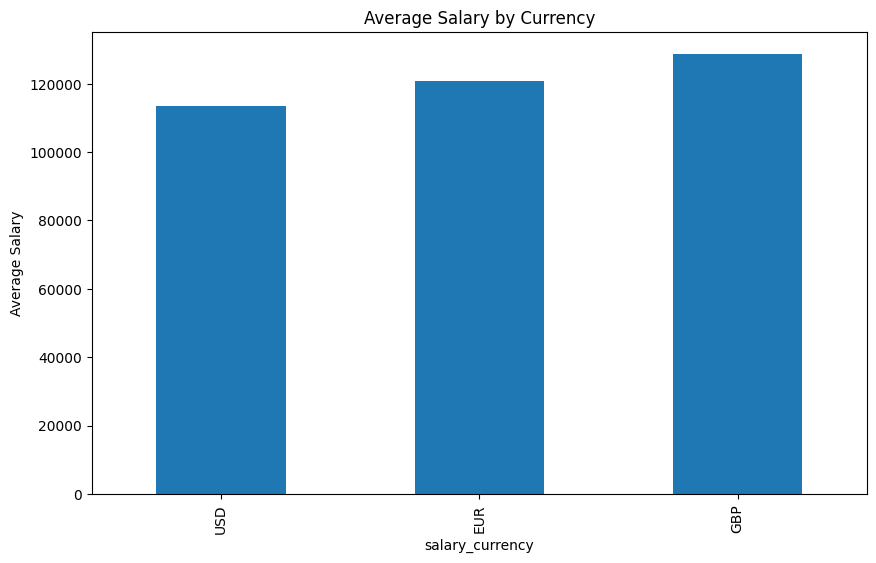

In [17]:
df.groupby('salary_currency')['salary'].mean().sort_values().plot(kind='bar', figsize=(10,6))
plt.title('Average Salary by Currency')
plt.ylabel('Average Salary')
plt.show()

Observation

           * EUR(Euro) European Union Currency and GBP(British Pound Sterling) United Kingdom currency have the highest salaries.

### Compare Salary with Experience Level

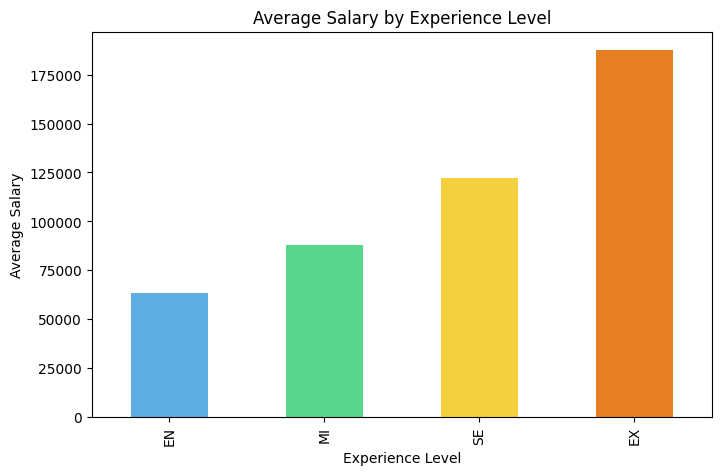

In [22]:
avg_salary_exp = df.groupby('experience_level')['salary'].mean().sort_values()
avg_salary_exp.plot(kind='bar', color=['#5DADE2', '#58D68D', '#F4D03F', '#E67E22'], figsize=(8,5))
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary')
plt.show()

Observation

           * Higher experience levels and seniors show higher average salaries.

           * Entry-level roles have the lowest average salaries, as expected.

### Compare Salary with Employment type

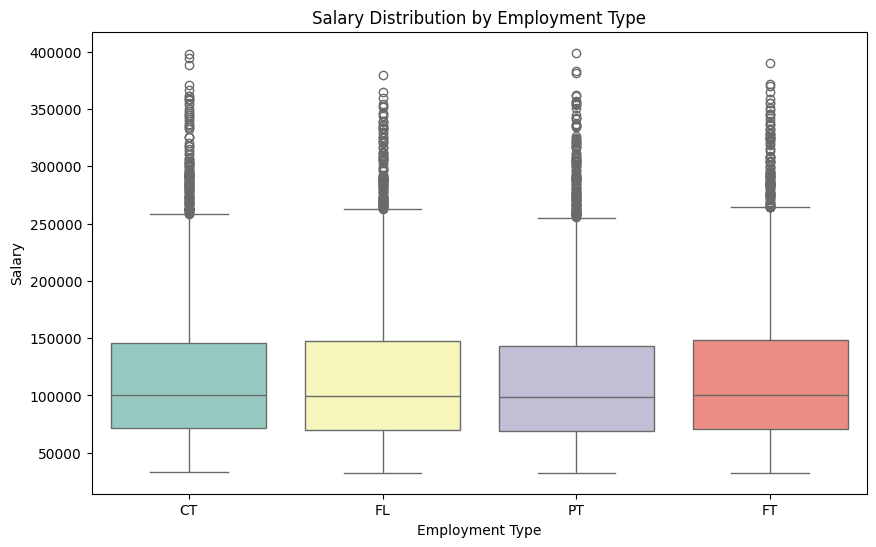

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(x='employment_type', y='salary', data=df, palette='Set3')
plt.title('Salary Distribution by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary')
plt.show()

Observation

           * Full-time employees have the highest salary range.

           * Part-time, contract, and freelance employees have medium salaries.

### Compare Salary with Company Location

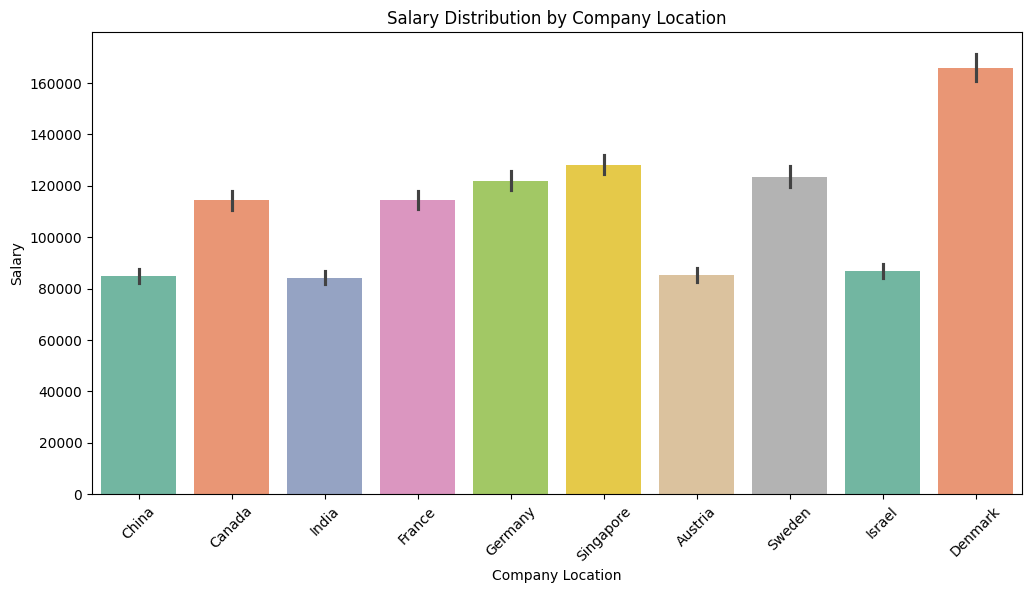

In [29]:
top_locations = df['company_location'].value_counts().nlargest(10).index
plt.figure(figsize=(12,6))
sns.barplot(data=df[df['company_location'].isin(top_locations)],x='company_location', y='salary', palette='Set2')
plt.title('Salary Distribution by Company Location')
plt.xlabel('Company Location')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

Observation

           * Countries like Canada, Singapore, and Denmark show the highest average salaries for AI jobs.

            * Countries such as India, China and Austria have lower average salaries.

### Compare Salary with employee residence

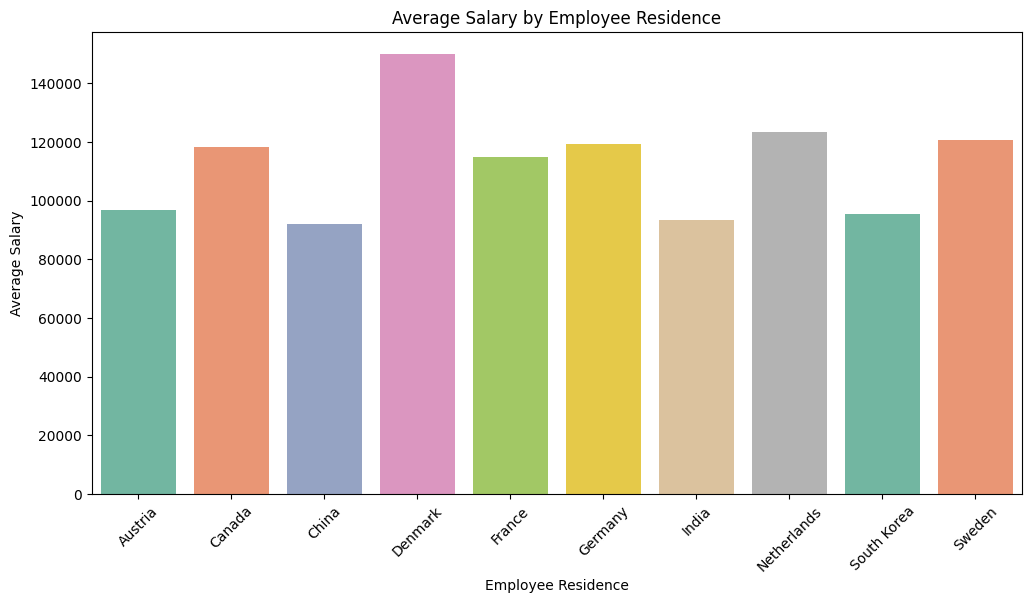

In [15]:
top_residence = df['employee_residence'].value_counts().nlargest(10).index

avg_salary = df[df['employee_residence'].isin(top_residence)].groupby('employee_residence')['salary'].mean()

plt.figure(figsize=(12,6))
sns.barplot(x=avg_salary.index, y=avg_salary.values, palette='Set2')
plt.title('Average Salary by Employee Residence')
plt.xlabel('Employee Residence')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

Observation

         * The graph calculates the average salary for employees in the top 10 most common residence countries.
         * Employees residing in countries like the Denmark, Netherlands, Germany and Canada higher average salaries. 
         * Countries such as India, China and South Korea have lower average salaries.

### Compare Salary with Remote Ratio

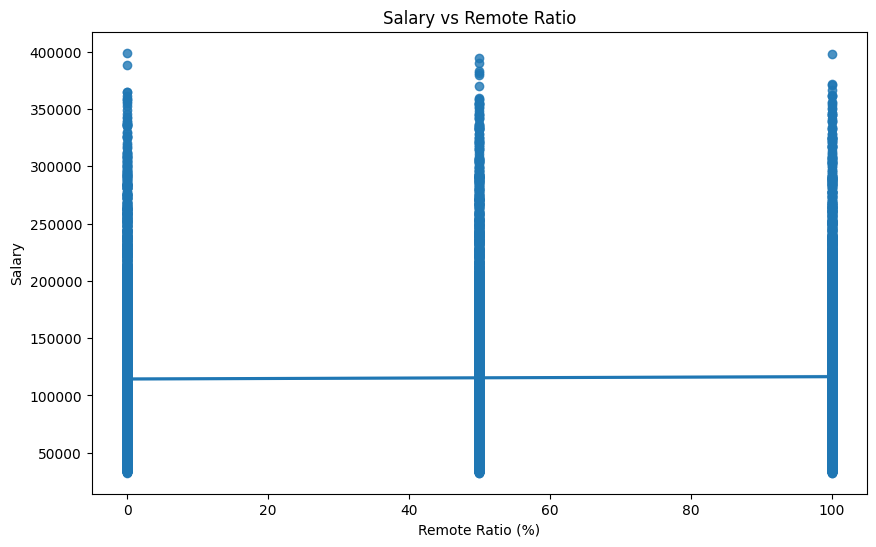

In [4]:
plt.figure(figsize=(10,6))
sns.regplot(x='remote_ratio', y='salary', data=df, color='#1f77b4' )
plt.title('Salary vs Remote Ratio')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Salary')
plt.show()

Observation
          
           * Most employees work fully onsite (0%), partly on-site (50%), or fully remote (100%).
           
           * Employees with fully remote work slightly have more salaries.

           * Jobs with 0% and 50% remote work generally have a lower salary.


### Compare Salary with Required Skills

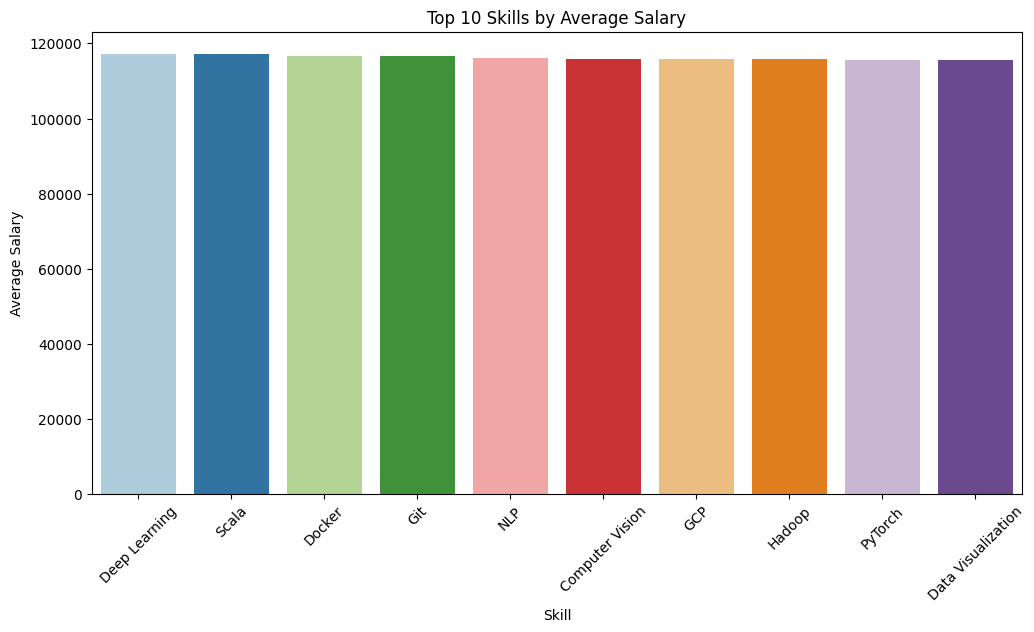

In [5]:

df['skill_list'] = df['required_skills'].str.split(',')
df_exploded = df.explode('skill_list')
df_exploded['skill_list'] = df_exploded['skill_list'].str.strip()
avg_salary_skill = df_exploded.groupby('skill_list')['salary'].mean().sort_values(ascending=False)
top_skills = avg_salary_skill.head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_skills.index, y=top_skills.values, palette='Paired')
plt.xticks(rotation=45)
plt.title('Top 10 Skills by Average Salary')
plt.xlabel('Skill')
plt.ylabel('Average Salary')
plt.show()

### Compare Salary with Education Required

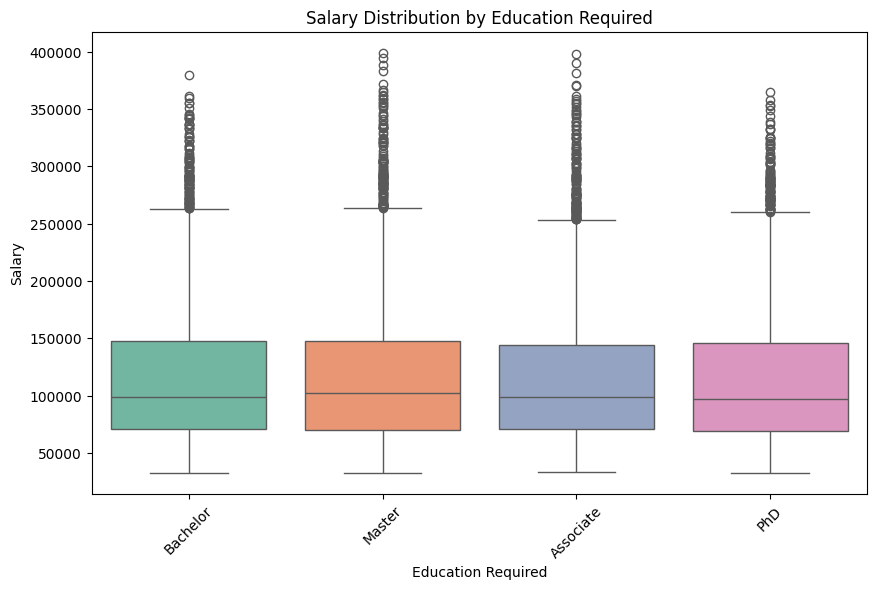

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x='education_required', y='salary', data=df, palette='Set2')
plt.title('Salary Distribution by Education Required')
plt.xlabel('Education Required')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

Observation

           * People with higher education levels (like Master’s or Ph.D.) generally have higher salary ranges.

### Compare Salary with Years experienced

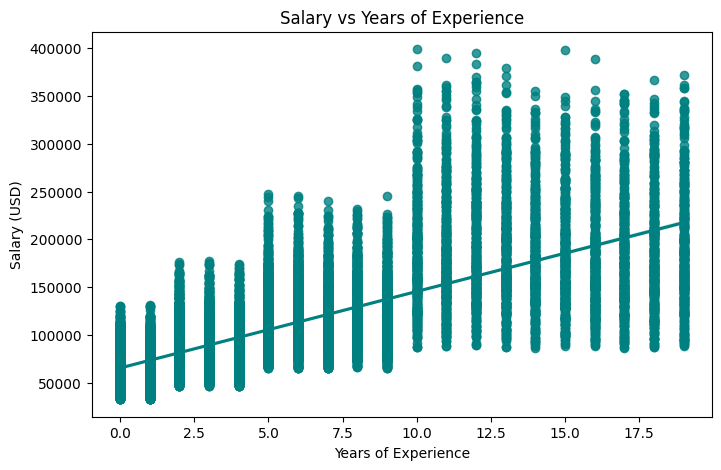

In [8]:
plt.figure(figsize=(8,5))
sns.regplot(x='years_experience', y='salary', data=df, color='teal')
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (USD)')
plt.show()

Observation:

           * From the above graph we can see that 

           * There is a positive correlation as years of experience increase, the salary also increases.

### Compare Salary with Industry

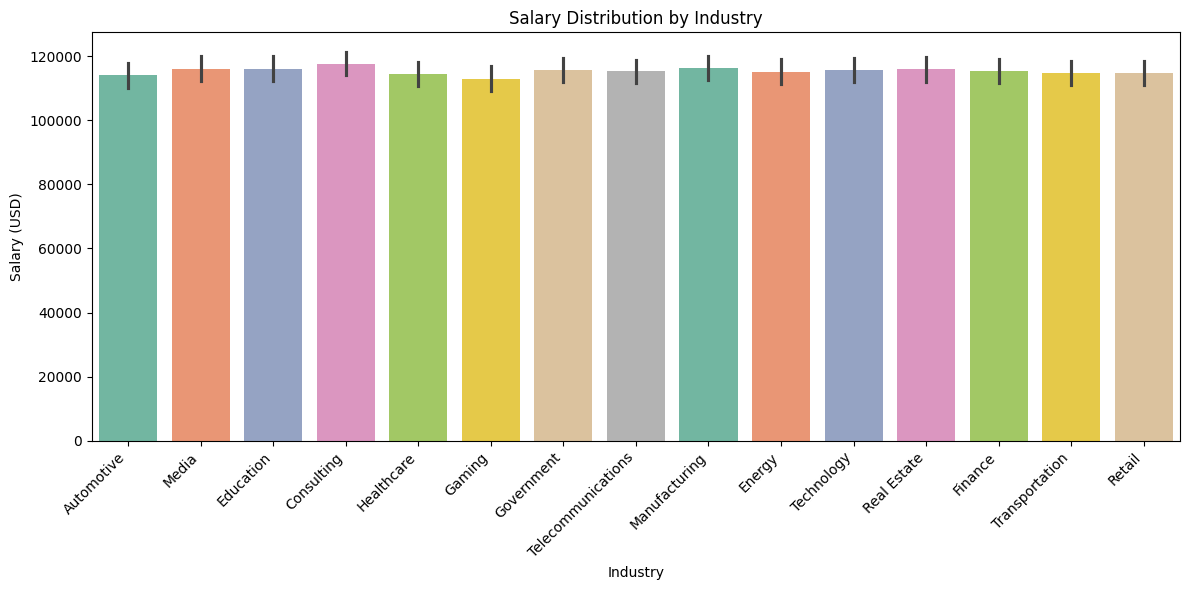

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(x='industry', y='salary', data=df, palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('Salary Distribution by Industry')
plt.xlabel('Industry')
plt.ylabel('Salary (USD)')
plt.tight_layout()
plt.show()

Observation:

            * Consulting and media industries offer the highest average salaries.

### Compare Salary with company name

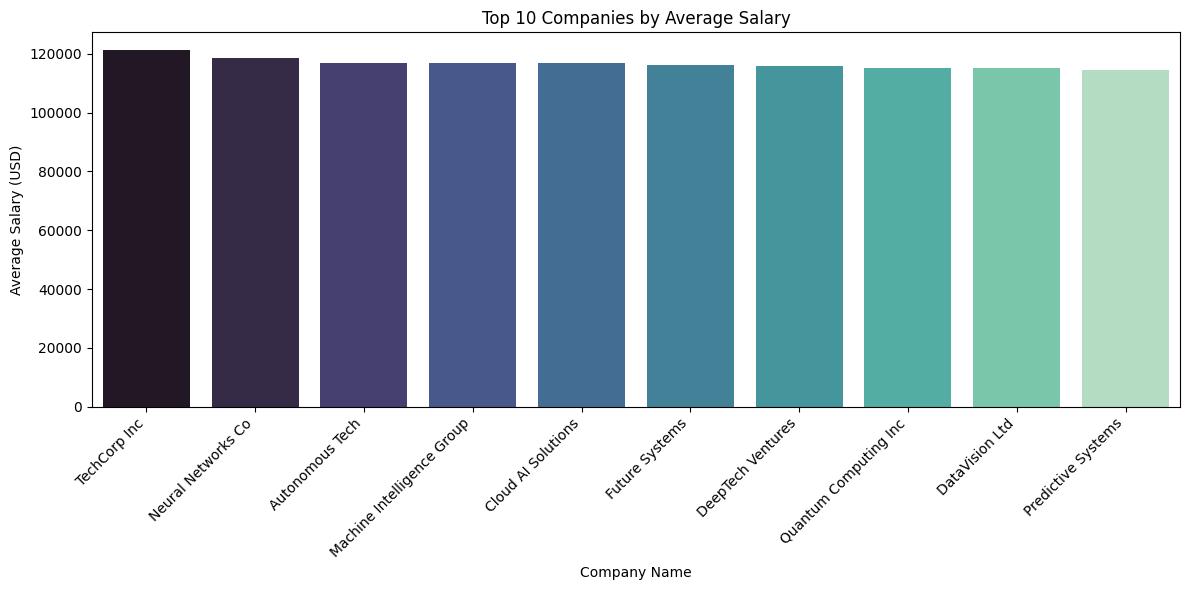

In [21]:
top_companies = df.groupby('company_name')['salary'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_companies.index, y=top_companies.values, palette='mako')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Companies by Average Salary')
plt.xlabel('Company Name')
plt.ylabel('Average Salary (USD)')
plt.tight_layout()
plt.show()

Observation:

            * TechCorp company offers highest salary.

In [5]:
num= df.select_dtypes(include='number')
num

,salary,remote_ratio,years_experience,job_description_length,benefits_score
0,90376,50,9,1076,5.9
1,61895,100,1,1268,5.2
2,152626,0,2,1974,9.4
3,80215,50,7,1345,8.6
4,54624,100,0,1989,6.6
...,...,...,...,...,...
14995,38604,50,1,1635,7.9
14996,57811,0,0,1624,8.2
14997,189490,50,17,1336,7.4
14998,79461,0,1,1935,5.6


In [6]:
correlation=num.corr()
correlation

,salary,remote_ratio,years_experience,job_description_length,benefits_score
salary,1.000000,0.013727,0.737556,-0.009092,0.000985
remote_ratio,0.013727,1.000000,0.015321,0.004475,0.003139
years_experience,0.737556,0.015321,1.000000,-0.007526,-0.007275
job_description_length,-0.009092,0.004475,-0.007526,1.000000,0.006744
benefits_score,0.000985,0.003139,-0.007275,0.006744,1.000000


<Axes: >

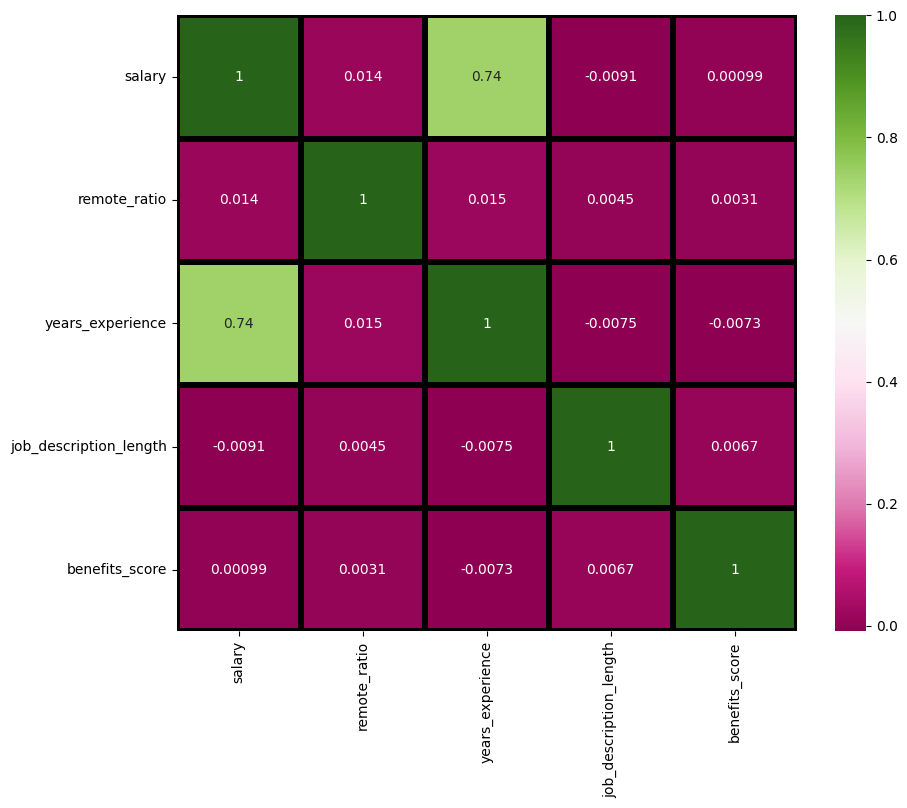

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(num.corr(),annot=True,linewidth=4,linecolor='k',cmap='PiYG')

Observation:

              * Salary shows a positive correlation with years of experience.
              
              * Job description length with salary has low negative correlation.